In [4]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.special import gammainc as gamma
from scipy.special import iv as I
from scipy.special import factorial
from scipy.signal import unit_impulse as delta
from scipy.stats import ncx2
marcumQ = ncx2.cdf
e = np.exp(1)

In [5]:
??marcumQ()

In [408]:
kap = 0.01 # trapping
k1 = 0.1 # rest
k2 = 1.0 # motion
v = 1.0
    
def p(x,t,kap=kap,k1=k1,k2=k2,v=v,special=False):
    t = t.astype('float128')
    x = x.astype('float64')
    kp = k1+k2
    tmxv = t-x/v
    the = np.heaviside(tmxv,1)
    tmxv[tmxv<=0]=0.0
    a = e**(-(kap+k1)*tmxv-k2*x/v)
    b = 1/v*np.sqrt(k1*k2*x/v/tmxv)*the*I(1,2*np.sqrt(k1*k2*x/v*tmxv))
    c = k2/v*the*I(0,2*np.sqrt(k1*k2*x/v*tmxv))
    d = kap*k2/v/(kap+k1)*the*e**(-k2*x/v)

    def P1(x,y):
        # this is the sum over incomplete gamma functions
        n = 150 # number of terms to keep in Q
        j = np.arange(n).reshape(-1,1).astype('float64')    
        Q = x**j/factorial(j)*gamma(j+1,y)
        return np.nansum(Q,0)
    
    def P1py(x,y):
        # it can also be expressed as a marcum Q-function
        # which is equivalent to a non-central chi-squared cdf
        # this code block provides
        # e^{-x}*\sum_{n=0}^\infty \frac{x^n}{n!n!}\gamma(n+1,y)
        from scipy.stats import ncx2
        Q = ncx2.cdf
        return Q(y*2,df=2,nc=2*x)        
    return a*(b+c)+d*e**(k1*k2*x/v/(kap+k1))*P1py( k1*k2*x/v/(kap+k1), (kap+k1)*tmxv)

    

/home/kpierce/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:14: RuntimeWarning: divide by zero encountered in true_divide
/home/kpierce/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:14: RuntimeWarning: invalid value encountered in true_divide
/home/kpierce/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:14: RuntimeWarning: invalid value encountered in multiply


0.0
0.9962525984091285
0.9976305463514838
0.997720450649813
0.9977263140397282
0.0
0.9979166902343739
0.999825475057405
0.9999853855436469
0.9999987766896051


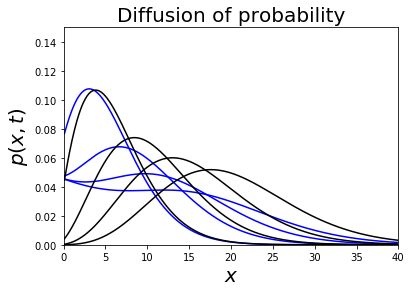

In [409]:
x = np.linspace(0,100,1000)
dx = x[1]-x[0]
t = np.linspace(0,100,5)
kap = 0.01 # trapping
k1 = 0.1 # rest
k2 = 1.0 # motion
v = 2.0
for tt in t:
    plt.plot(x,p(x,tt,kap=kap,k1=k1,k2=k2,v=v),color='blue')
    print(np.nansum(p(x,tt,kap=kap,k1=k1,k2=k2,v=v))*dx)
    
kap = 0.0 # trapping
k1 = 0.1 # rest
k2 = 1.0 # motion
v = 2.0
for tt in t:
    plt.plot(x,p(x,tt,kap=kap,k1=k1,k2=k2,v=v),color='black')
    print(np.nansum(p(x,tt,kap=kap,k1=k1,k2=k2,v=v))*dx)
    
plt.xlim(0,40)
plt.ylim(0,0.15)
plt.xlabel(r'$x$',fontsize=20)
plt.ylabel(r'$p(x,t)$',fontsize=20)
plt.title('Diffusion of probability',fontsize=20)
plt.savefig('trapping-pdf.png', bbox_inches='tight')


In [287]:
t = np.linspace(0,500,1000)
x = np.linspace(0,500,1000)
kap = 0.05 # trapping
k1 = 0.1 # rest
k2 = 1.0 # motion
v = 2.0
# calculate the variance
P = []
for tt in t:
    P.append(p(x,tt,kap=kap,k1=k1,k2=k2,v=v))

/home/kpierce/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/home/kpierce/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/home/kpierce/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1738: RuntimeWarning: invalid value encountered in greater_equal
  cond2 = (x >= self.b) & cond0


In [235]:
means = [np.nansum(x*p) for p in P]
var = [np.nansum((x*p-m)**2) for m,p in zip(means,P)]

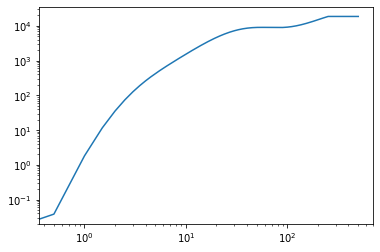

In [236]:
plt.loglog(t,var)

In [392]:
def P1(x,y):
    x = np.float128(x)
    n = 500 # number of terms to keep in Q
    j = np.arange(n).reshape(-1,1).astype('float64')    
    Q = x**j/factorial(j)*gamma(j+1,y)
    return e**(-x)*Q.sum(0)


def P1py(x,y):
    # this is equivalent to 
    # e^{-x}*\sum_{n=0}^\infty \frac{x^n}{n!n!}\gamma(n+1,y)
    from scipy.stats import ncx2
    Q = ncx2.cdf
    return Q(y*2,df=2,nc=2*x)   

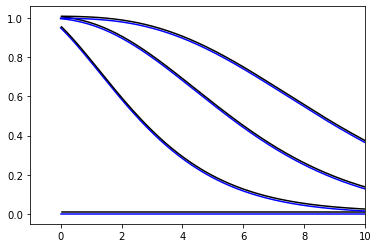

In [396]:
ep = 1e-2
x = np.linspace(0,30,1001)
y = np.arange(0,10,3)
plt.xlim(-1,10)
for yy in y:
    plt.plot(x,P1(x,yy),color='blue')
    plt.plot(x,P1py(x,yy)+ep,color='black')